In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_path = "C:\windows\Fonts\Malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)


In [52]:
totaldata = pd.read_csv('../data/전체 사고대비 노인사고/전체보행교통사고.csv', encoding = 'euc=kr')
totaldata.rename(columns={'Unnamed: 0':'년도', '합계':'전체사고'}, inplace = True)

In [53]:
totaldata.head()

,년도,전체사고
0,2007,9579
1,2008,10680
2,2009,11183
3,2010,10946
4,2011,11047


In [54]:
seniordata = pd.read_csv('../data/전체 사고대비 노인사고/노인보행교통사고.csv', encoding = 'euc=kr')
seniordata.rename(columns={'합계':'노인사고'}, inplace=True)

In [55]:
seniordata.drop('Unnamed: 0',axis=1,inplace=True)

In [56]:
seniordata.head()

,년도,노인사고
0,2007,2642
1,2008,3100
2,2009,3609
3,2010,3528
4,2011,3733


In [57]:
data = pd.merge(totaldata,seniordata, on='년도')
data.head()

,년도,전체사고,노인사고
0,2007,9579,2642
1,2008,10680,3100
2,2009,11183,3609
3,2010,10946,3528
4,2011,11047,3733


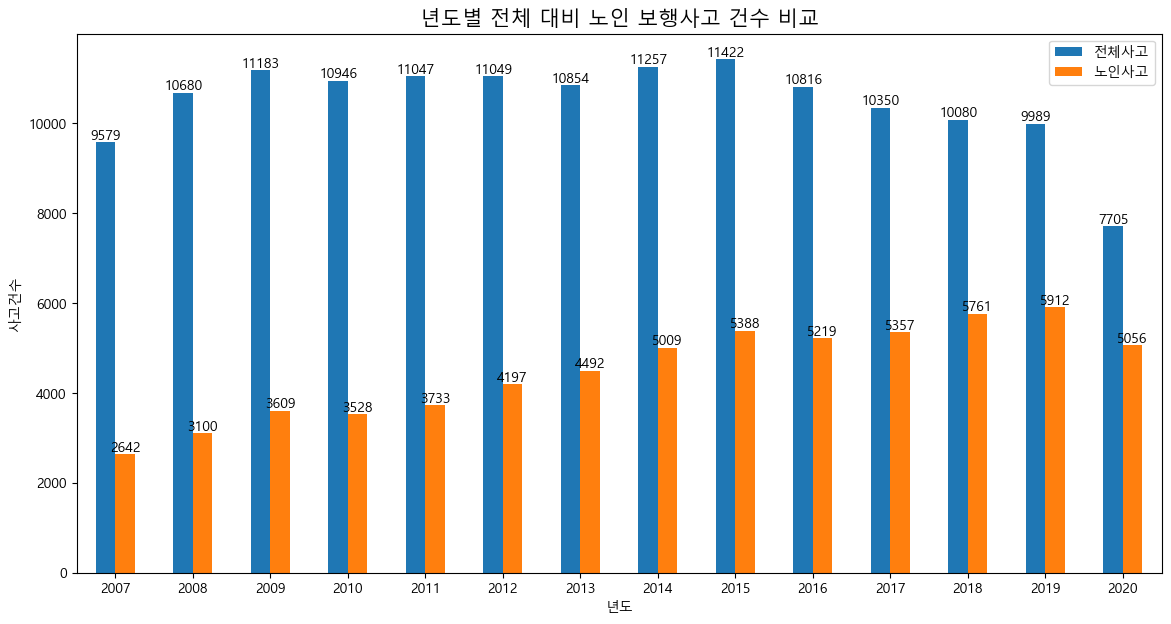

In [67]:
ax = data.plot(x='년도', y=["전체사고", "노인사고"], kind="bar",figsize=(14,7), rot=0)
plt.title('년도별 전체 대비 노인 보행사고 건수 비교', size = 15)
plt.xlabel('년도',fontsize = 10)
plt.ylabel('사고건수', fontsize = 10)

for temp in ax.patches:
    ax.annotate('%d'%temp.get_height(),(temp.get_x()+temp.get_width()/2 , temp.get_height()) , ha = 'center' , va='bottom')
    
plt.show()

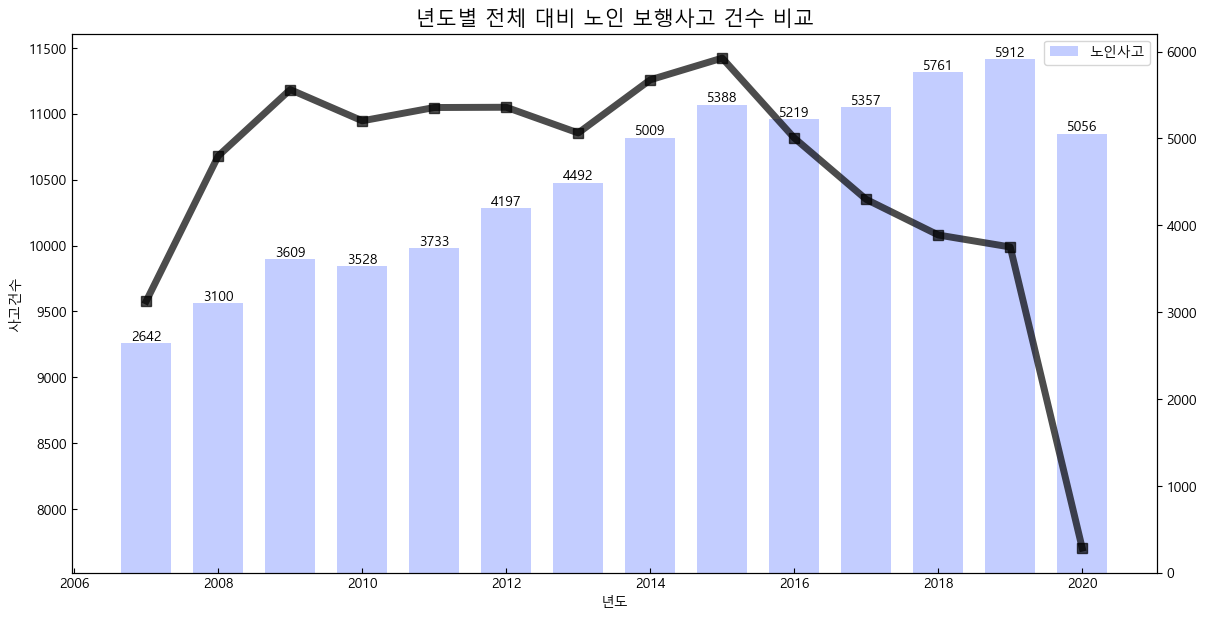

In [88]:
plt.rcParams['figure.figsize'] = (14,7)
fig, ax1 = plt.subplots()
ax1.plot(data['년도'],data['전체사고'],'-s', color='black', markersize=7, linewidth=5, alpha=0.7,label='전체사고' )
ax1.tick_params(axis='both',direction='in')
plt.title('년도별 전체 대비 노인 보행사고 건수 비교' ,size = 15)
plt.xlabel('년도',fontsize = 10)
plt.ylabel('사고건수', fontsize = 10)
ax2 = ax1.twinx()
ax2.bar(data['년도'],data['노인사고'], color='#AAB9FF', label='노인사고', alpha=0.7, width=0.7)
for temp in ax2.patches:
    ax2.annotate('%d'%temp.get_height(),(temp.get_x()+temp.get_width()/2 , temp.get_height()) , ha = 'center' , va='bottom')
plt.legend()
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.show()